<a href="https://colab.research.google.com/github/Sujana-Mollick/Cat-vs.-Dog-Classification-with-Heatmap-Visualization/blob/main/Cat_vs_Dog_Classification_with_Heatmap_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load images**

In [ ]:
from google.colab import drive
drive.mount('/content/DATA') #directories of drive items

TRAIN_DIR = "./DATASET"#create path
ORG_DIR = "/content/train"#create path
CLASS = ['cat', 'dog']

from zipfile import ZipFile
with ZipFile('/content/DATA/MyDrive/Colab Notebooks/train.zip', 'r') as zipobj:
    zipobj.extractall('/content/train') #extract train images

with ZipFile('/content/DATA/MyDrive/Colab Notebooks/test.zip', 'r') as zipobj:
    zipobj.extractall('/content/test') #extract test images

Mounted at /content/DATA


**Copy images based on name**

In [ ]:
import os
import glob
import shutil

for C in CLASS:
    DEST = os.path.join(TRAIN_DIR, C) # just create path for classes

    # if directory is not present then create one
    if not os.path.exists( DEST ):
        os.makedirs(DEST)

    for img_path in glob.glob (os.path.join(ORG_DIR, C)+"*" ):
        SRC = img_path
        shutil.copy(SRC,DEST)

In [ ]:
os.listdir("/content/train")

['cat.10160.jpg',
 'cat.10240.jpg',
 'cat.10289.jpg',
 'dog.10296.jpg',
 'cat.1004.jpg',
 'dog.10179.jpg',
 'cat.10321.jpg',
 'cat.10170.jpg',
 'dog.10156.jpg',
 'cat.10356.jpg',
 'cat.10013.jpg',
 'dog.10367.jpg',
 'cat.10022.jpg',
 'cat.10241.jpg',
 'dog.10010.jpg',
 'cat.1002.jpg',
 'dog.10085.jpg',
 'cat.10103.jpg',
 'dog.10079.jpg',
 'dog.9970.jpg',
 'dog.10075.jpg',
 'dog.10344.jpg',
 'dog.10039.jpg',
 'dog.10314.jpg',
 'dog.10022.jpg',
 'cat.10248.jpg',
 'dog.10046.jpg',
 'cat.10060.jpg',
 'cat.10347.jpg',
 'dog.1027.jpg',
 'dog.1004.jpg',
 'dog.10008.jpg',
 'dog.10232.jpg',
 'dog.10416.jpg',
 'dog.10023.jpg',
 'cat.10270.jpg',
 'cat.10325.jpg',
 'dog.10182.jpg',
 'cat.10092.jpg',
 'cat.10377.jpg',
 'dog.10378.jpg',
 'cat.10231.jpg',
 'dog.10101.jpg',
 'cat.10380.jpg',
 'cat.10292.jpg',
 'dog.10159.jpg',
 'dog.10111.jpg',
 'cat.10273.jpg',
 'cat.10357.jpg',
 'cat.10064.jpg',
 'cat.10145.jpg',
 'dog.10177.jpg',
 'dog.10299.jpg',
 'dog.10216.jpg',
 'cat.10134.jpg',
 'dog.1035.jpg'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#!pip install --upgrade keras
!pip install keras==2.13.1rc0

#!pip install --upgrade tensorflow
!pip install tensorflow==2.12.0rc1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.1 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.13.1rc0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully un

In [ ]:
import tensorflow
from keras.layers import Dense, Flatten

In [ ]:
from keras.models import Model # for functional API
from keras.applications.inception_v3 import InceptionV3, preprocess_input # for pretrained model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import losses

In [ ]:
#Download InceptionV3 model
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False # we do not train

**Create Model**

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X)  # Update units to 2
model = Model(base_model.input, X)
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center= True,
                                    rotation_range= 0.4,
                                    width_shift_range= 0.3,
                                    horizontal_flip= True,
                                    preprocessing_function= preprocess_input,
                                    zoom_range= 0.4,
                                    shear_range= 0.4)

train_data = train_datagen.flow_from_directory(directory="/content/DATASET",
                                                target_size=(256,256),
                                                batch_size= 36)

Found 1000 images belonging to 2 classes.


In [ ]:
t_img , label = train_data.next()
t_img.shape

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


(36, 256, 256, 3)

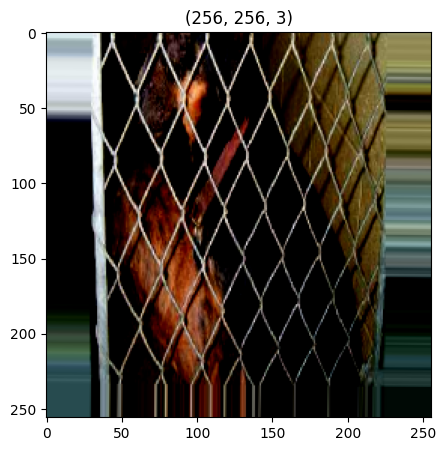

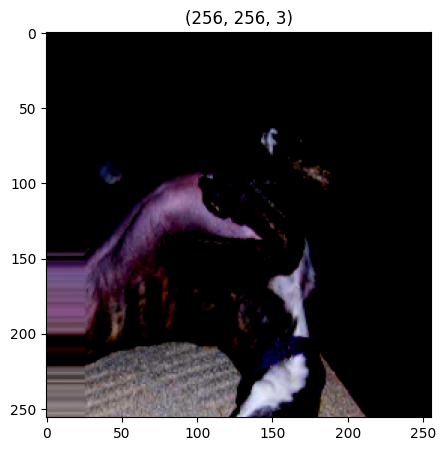

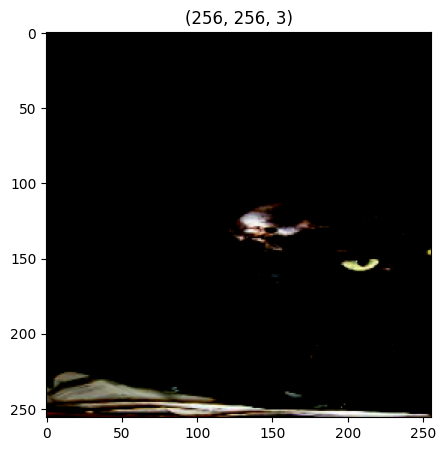

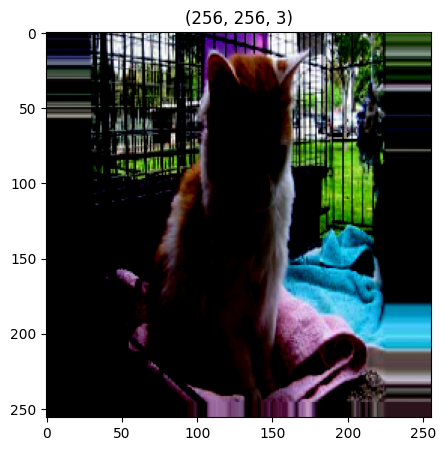

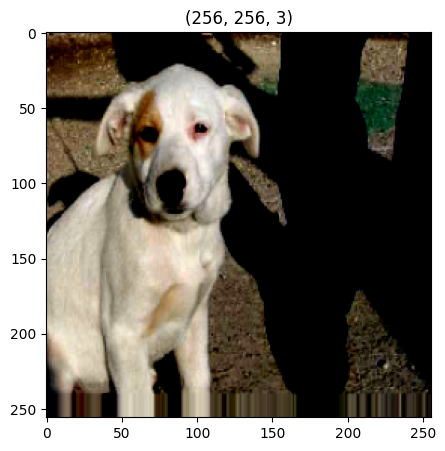

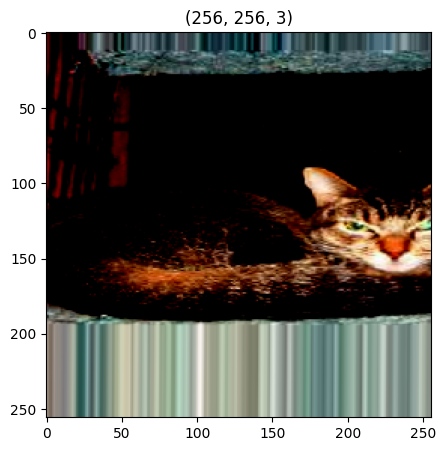

In [ ]:
def plotImages(img_arr, label):
    for idx, img in enumerate(img_arr):
        if idx <= 5:
            plt.figure(figsize=(5, 5))
            plt.imshow(img, vmin=0, vmax=1)
            plt.title(img.shape)
            plt.axis = False
            plt.show()
plotImages(t_img , label)

**Model Fitting**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5",
                    monitor="accuracy",
                    verbose= 1,
                    save_best_only= True )

es = EarlyStopping(monitor= "accuracy",
                    min_delta = 0.02,
                    patience= 5,
                    verbose= 1)

cb = [mc, es]

In [ ]:
his = model.fit_generator(train_data,
                          steps_per_epoch= 10,
                          epochs=10,
                          callbacks= cb)

<ipython-input-15-5828c5e8129d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train_data,


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 2.2069 - accuracy: 0.7194
Epoch 1: accuracy improved from -inf to 0.71944, saving model to ./best_model.h5
10/10 [==============================] - 80s 7s/step - loss: 2.2069 - accuracy: 0.7194
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.3947 - accuracy: 0.9361
Epoch 2: accuracy improved from 0.71944 to 0.93611, saving model to ./best_model.h5
10/10 [==============================] - 71s 7s/step - loss: 0.3947 - accuracy: 0.9361
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.2306 - accuracy: 0.9639
Epoch 3: accuracy improved from 0.93611 to 0.96389, saving model to ./best_model.h5
10/10 [==============================] - 71s 7s/step - loss: 0.2306 - accuracy: 0.9639
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.1977 - accuracy: 0.9667
Epoch 4: accuracy improved from 0.96389 to 0.96667, saving model to ./best_model.h5
10/10 [=======================

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

**Plot Loss & Accuracy**

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

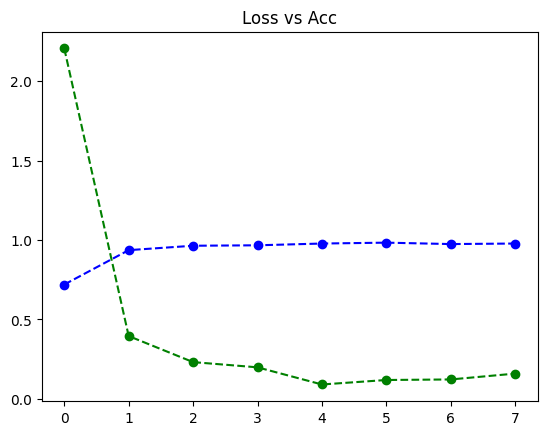

In [ ]:
import warnings
warnings.filterwarnings("ignore") # for ignoring warnings

plt.plot(h['loss'] , 'go--' , c = "green" , )
plt.plot(h['accuracy'] , 'go--' , c = "blue" , )

plt.title("Loss vs Acc")
plt.show

**Validate Model**

In [ ]:
# path for the image to see if it predicts the correct class
path = "/content/test/dog.9783.jpg"
img = load_img(path, target_size=(256, 256))

i = img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
    print("The image is of a cat")
else:
    print("The image is of a dog")

# Display the image
plt.imshow(input_arr[0])
plt.title("Input image")
#plt.axis('off')
plt.show()


In [ ]:
def get_img_arrray(img_path):

    img = load_img(path, target_size=(256,256))
    img = img_to_array(img)
    img = preprocess_input(img)
    #expand the dimentions
    img = np.array([img])
    return img

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def make_gradcam_heatmap(img_path):
    # Define the model architecture
    model = tf.keras.applications.VGG19(weights='imagenet')

    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)


    # Get the output of the last convolutional layer
    last_conv_layer = model.get_layer('block5_conv3')

    # Create a new model that outputs both the predictions and the last conv layer output
    heatmap_model = tf.keras.models.Model(model.input, (model.output, last_conv_layer.output))

    # Compute the gradients of the predicted class with respect to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        preds, last_conv_layer_output = heatmap_model(x)
        class_output = preds[:, np.argmax(preds[0])]
        grads = tape.gradient(class_output, last_conv_layer_output)

    # Global average pooling of the gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each channel in the feature map array by the corresponding gradient importance
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)

    # Visualize the heatmap
    plt.matshow(heatmap)
    plt.show()

    return heatmap.numpy()


# Mask HeatMap on Image
import matplotlib.cm as cm
import tensorflow.keras as keras
from IPython.display import Image, display

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = img_to_array(load_img(img_path))

    heatmap = np.uint8(255 * heatmap)
    jet_heatmap = cm.jet(np.arange(256))[:, :3]
    jet_colors = jet_heatmap[heatmap]

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_colors)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)
    display(Image(cam_path))


# image_prediction_and_visualization
def image_prediction_and_visualization(path, last_conv_layer_name="conv2d_23", model=model):
    """
    Input: Image path, name of the last convolution layer, model name
    Output: Predictions and the area that is affected
    """
    img_array = get_img_arrray(path)
    heatmap = make_gradcam_heatmap(path)
    pred = np.argmax(model.predict(preprocess_input(img_array)))

    if pred == 0:
        print("The image is of a Cat")
    else:
        print("The image is of a Dog")

    print("Image with heatmap representing region of interest")

    # Function call
    save_and_display_gradcam(path, heatmap)

    a = plt.imread(path)
    #plt.imshow(a, camp ="gray")
    plt.imshow(a, cmap="gray")
    plt.title("Original image")
    plt.show()


# predictions

path = "/content/360_F_97589769_t45CqXyzjz0KXwoBZT9PRaWGHRk5hQqQ.jpg"
image_prediction_and_visualization(path)